**GUETIF  AMEN  ALLAH**

**Facial expression recognition**
"Facial expressions" sont l'un des moyens de communication des humains. Les approches d'apprentissage profond dans les interactions entre l'homme et l'ordinateur sont utilisées dans la recherche sur l'intelligence artificielle comme un processus d'application de système efficace. La détection des émotions ou des expressions faciales en psychologie nécessite l'examen et l'évaluation des décisions dans l'anticipation des sentiments d'une personne ou d'un groupe de personnes qui communiquent. Cette étude propose le développement d'un système qui peut prédire et reconnaître la classification des émotions faciales en utilisant l'algorithme du réseau neuronal à convolution (CNN) et l'extraction de caractéristiques.

Le prétraitement des données, l'extraction des caractéristiques faciales et la classification des émotions faciales sont les trois étapes clés du notebook. Les expressions faciales ont été prédites en utilisant le réseau neuronal à convolution CNN et le modele Xception du tansfer learning. 

**L'utilisation de la reconnaissance des expressions faciales**

Il existe de nombreuses utilisations pour savoir quelle est l'expression faciale dans une image. Par exemple :

Réseaux sociaux professionnels (Linkedin) - Comment notre photo de profil est-elle diffusée aux autres personnes (explicitement les recruteurs) ?

Réseaux sociaux: 

*   Comment notre photo de profil est-elle diffusée à d'autres personnes ?
*   Détection des expressions problématiques (colère, tristesse, etc.) de nos amis et prévention des événements malheureux.
*    Augmentation de la confiance pour partager nos images (si nous savons qu'elles montrent des expressions positives).


**Dataset FER**

Le jeu de données FER est constitué d'images de visages en niveaux de gris de 48x48 pixels et de leur émotion correspondante (0=colère, 1=dégoût, 2=peur, 3=heureux, 4=triste, 5=surprise, 6=neutre).

L'ensemble d'apprentissage est composé de 28 709 exemples. L'ensemble de test (validation) public est composé de 3 589 exemples. L'ensemble de test privé (test), qui a été utilisé pour un total de 35 887 images, est composé de 3 589 autres exemples.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from typing import Dict, List
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

sns.set_theme(style="darkgrid")

Loading the FER csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/FER.csv"
data = pd.read_csv(path)
#check data shape
data.shape

Mounted at /content/drive


(35887, 3)

 Displaying the first and last few rows to know the data

In [ ]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
data.tail(10)

,emotion,pixels,Usage
35877,6,139 143 145 154 159 168 176 181 190 191 195 19...,PrivateTest
35878,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...,PrivateTest
35879,2,0 0 6 16 19 31 47 18 26 19 17 8 15 3 4 2 14 20...,PrivateTest
35880,2,164 172 175 171 172 173 178 181 188 192 197 20...,PrivateTest
35881,0,181 177 176 156 178 144 136 132 122 107 131 16...,PrivateTest
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


As we can see, each row includes:

The image emotion.

The image pixels values.

Its Usage - PrivateTest (Test), PublicTest (Validation), Training.

Let's get rid of the usage column, because we will split the data to training, testing and valadition for our model with training-set : 80% validation-set : 10%  and test-set : 10%

In [ ]:
data: pd.DataFrame = data.drop("Usage", axis=1)
data.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


Checking the data balance

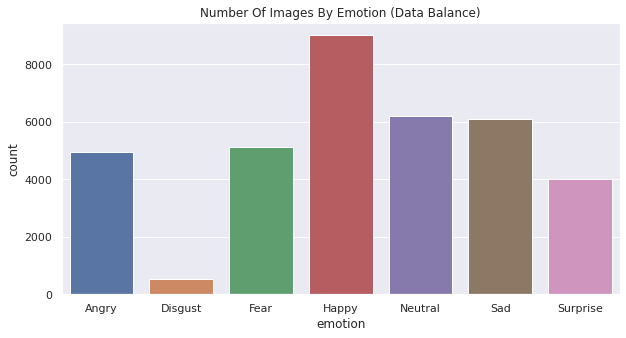

In [ ]:
# Mapping of emotion value to string 
emotion_map: Dict[int,str] = {0:"Angry", 1:"Disgust", 2:"Fear",
                              3:"Happy", 4:"Sad", 5:"Surprise",
                              6:"Neutral"}

# Creating dataframe of all emotion strings
emotion_labels: pd.DataFrame = data["emotion"].apply(
    lambda x: emotion_map[x])

# plot
plt.figure(figsize=(10,5))
plt.title("Number Of Images By Emotion (Data Balance)")
sns.countplot(x=emotion_labels.sort_values())
plt.show()

As we can see, all of the data is balanced except disgust images. For disgust images there are two options:

Remove the disgust images in order to balance data but we will lose a class.
Leave the disgust images - can cause cause a lower classification accuracy, but we are going to keep it

Creating images and labels from our data

In [ ]:
# Creating list for images
images: List[np.ndarray] = []
# Creating list for labels
labels: List[int] = []

# Loop over all rows and get image and its corresponding label
for index, row in data.iterrows():
    # Split images pixels str to get a list of pixels
    image_arr: List[str] = row["pixels"].split(" ")
    # Create 48 x 48 image from pixels list (Reshaping the data (48,48))
    image: np.ndarray = np.asarray(
        image_arr, dtype=np.float32).reshape((48, 48))
    # Append image and its corresponding label
    images.append(image)
    labels.append(row["emotion"])

# convert list to numpy arrays
images: np.ndarray = np.asarray(images)
labels: np.ndarray  = np.asarray(labels)


Images and labels shape

In [ ]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {images.shape}")

Images shape: (35887, 48, 48)
Labels shape: (35887, 48, 48)


Displaying a few images

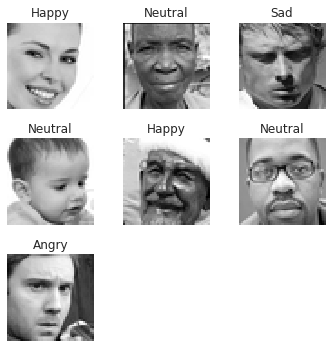

In [ ]:
# Create sub plot
fig: mpl.figure.Figure = None
ax: np.ndarray = None
fig, ax = plt.subplots(3, 3, figsize=(5,5))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

# add image 1
ax[0, 0].imshow(images[6292], cmap="gray", interpolation='nearest')
ax[0, 0].axis('off')
ax[0, 0].set_title(emotion_map[labels[6292]])

# add image 2
ax[0, 1].imshow(images[6590], cmap="gray", interpolation='nearest')
ax[0, 1].axis('off')
ax[0, 1].set_title(emotion_map[labels[6590]])

# add image 3
ax[0, 2].imshow(images[6312], cmap="gray", interpolation='nearest')
ax[0, 2].axis('off')
ax[0, 2].set_title(emotion_map[labels[6312]])

# add image 4
ax[1, 0].imshow(images[6297], cmap="gray", interpolation='nearest')
ax[1, 0].axis('off')
ax[1, 0].set_title(emotion_map[labels[6297]])

# add image 5
ax[1, 1].imshow(images[28945], cmap="gray", interpolation='nearest')
ax[1, 1].axis('off')
ax[1, 1].set_title(emotion_map[labels[28945]])

# add image 6
ax[1, 2].imshow(images[6296], cmap="gray", interpolation='nearest')
ax[1, 2].axis('off')
ax[1, 2].set_title(emotion_map[labels[6296]])

# add image 7
ax[2, 0].imshow(images[0], cmap="gray", interpolation='nearest')
ax[2, 0].axis('off')
ax[2, 0].set_title(emotion_map[labels[0]])

# plot
plt.tight_layout()
plt.show()

##*Model 1 - Transfer Learning + Fine Tuning using Xception*
We will create a deep neural network model to predict for each image its label using transfer learning and Fine tuning with a pre-trained Xception model.

We begin with spliting our data into train and test data. Then, we preprocess the images:

Reshape images to 96 x 96 x 3 because Xception model expects rgb images bigger than 71 x 71.

Use Xception preprocess_input for images.

Create one hot of labels for model training.

In [ ]:
# define arrays
x_train: np.ndarray = None
x_test: np.ndarray = None
y_train: np.ndarray = None
y_test: np.ndarray = None
x_val: np.ndarray = None
y_val: np.ndarray = None
    
# Split data into training, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, stratify=y_train_val)


**Data Preprocessing for our model**

In [ ]:
# resize images and change to rgb (reshaping to 96,96,3)
x_train = np.asarray(
    [keras.applications.xception.preprocess_input(
        cv2.cvtColor(
            cv2.resize(img, (96,96)),
            cv2.COLOR_GRAY2RGB)) for img in x_train])
x_test = np.asarray(
    [keras.applications.xception.preprocess_input(
        cv2.cvtColor(
            cv2.resize(img, (96,96)),
            cv2.COLOR_GRAY2RGB)) for img in x_test])
x_val = np.asarray(
    [keras.applications.xception.preprocess_input(
        cv2.cvtColor(
            cv2.resize(img, (96,96)),
            cv2.COLOR_GRAY2RGB)) for img in x_val])

# convert class vectors (integers) to binary class matrix : we will do one hot encoding operation
# to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.
y_train = keras.utils.to_categorical(y_train, 7)
y_test = keras.utils.to_categorical(y_test, 7)
# convert class vectors (integers) to binary class matrix
y_val = keras.utils.to_categorical(y_val, 7)


Generators will perform data augmentation on the images during training to improve model performance and reduce overfitting.

The ImageDataGenerator function is used to create the generators, and various augmentation parameters are specified, such as brightness_range, channel_shift_range, horizontal_flip, rotation_range, width_shift_range, height_shift_range, and zoom_range. These parameters control the types and degrees of augmentation that will be applied to the images during training.

The fit method is called on both the training and validation data generators to prepare them for use.

Finally, the flow method is used to create the actual generators that will feed the augmented data to the model during training and validation. The batch_size parameter specifies the number of images to include in each batch.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
    # create data generator for training set
        
train_datagen = ImageDataGenerator(
    brightness_range=[0.5, 1.5],
    channel_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=30, 
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2
)

# create data generator for validation set

val_datagen = ImageDataGenerator(
    brightness_range=[0.5, 1.5],
    channel_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2
)

train_datagen.fit(x_train)
val_datagen.fit(x_val)
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
val_generator = train_datagen.flow(x_val, y_val, batch_size=64)

Next, we build the transfer learning model to predict our image labels.

As we can see, the model model architecture is

Input layer for 96 X 96 X 3 images.

Xception without its top layers (classification layers) - with trainable.

Our classification layer.

In [ ]:
# base model for transfer learning
base_model: keras.Model = keras.applications.Xception(
    weights='imagenet', input_shape=(96, 96, 3),
    include_top=False, pooling='avg')

# freeze the base_model so it will not train
base_model.trainable = True

# create new model
model: keras.Model = keras.models.Sequential(
    [
     # input layer
     keras.Input(shape=(96, 96, 3)),
     # Xception model
     base_model,
     # fully connected layers
     keras.layers.Dropout(0.5),
     keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
     # classification layer
     keras.layers.Dense(7, activation='softmax')
    ]
)
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,387,823
Trainable params: 21,333,295
Non-trainable params: 54,528
_________________________________________________________________


Adam optimizer is a stochastic gradient descent optimizer that adapts the learning rate for each parameter based on the first and second moments of the gradients. Categorical crossentropy is a loss function used for multi-class classification problems, and it measures the difference between the predicted probability distribution and the actual probability distribution. Finally, accuracy is a metric that measures the percentage of correctly predicted labels.

So let's compile the model using categorical crossentropy because this is a multi-class classification task:

In [ ]:
# compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
# path to save best model weights
checkpoint_file_path = '/content/checkpoint'

# model check point to save best model weights
model_checkpoint_callback = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,save_weights_only=True,
    monitor='val_accuracy', mode='max',save_best_only=True)
]

history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data = val_datagen.flow(x_val, y_val, batch_size=32),
    epochs=30,callbacks=[model_checkpoint_callback]
)
                          

<ipython-input-24-4aab8ff39e5b>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
909/909 [==============================] - 189s 162ms/step - loss: 1.6619 - accuracy: 0.4464 - val_loss: 1.3496 - val_accuracy: 0.5019
Epoch 2/30
909/909 [==============================] - 144s 158ms/step - loss: 1.3068 - accuracy: 0.5301 - val_loss: 1.2749 - val_accuracy: 0.5455
Epoch 3/30
909/909 [==============================] - 146s 160ms/step - loss: 1.2250 - accuracy: 0.5593 - val_loss: 1.3011 - val_accuracy: 0.5337
Epoch 4/30
909/909 [==============================] - 152s 167ms/step - loss: 1.1839 - accuracy: 0.5777 - val_loss: 1.1853 - val_accuracy: 0.5752
Epoch 5/30
909/909 [==============================] - 146s 160ms/step - loss: 1.1450 - accuracy: 0.5926 - val_loss: 1.1607 - val_accuracy: 0.5923
Epoch 6/30
909/909 [==============================] - 153s 168ms/step - loss: 1.1158 - accuracy: 0.6037 - val_loss: 1.2122 - val_accuracy: 0.5690
Epoch 7/30
909/909 [==============================] - 147s 162ms/step - loss: 1.0890 - accuracy: 0.6121 - val_loss: 1.0979 -

**Visualizing our model performance**

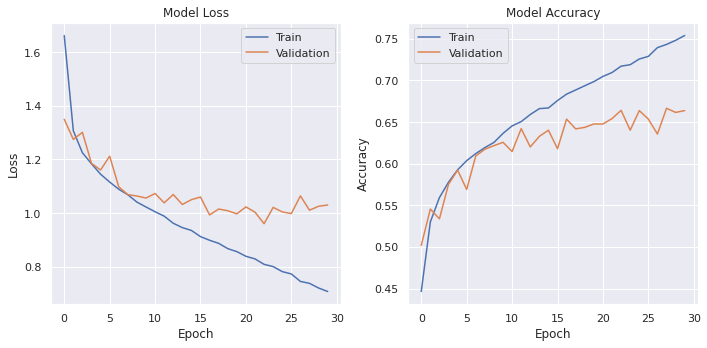

In [ ]:
# create sub plot
fig: mpl.figure.Figure = None
ax: np.ndarray = None
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# add loss plot
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper right')

# add accuracy plot
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

# plot
plt.tight_layout()
plt.show()
     

**Training and Validation Loss Plots**: The training and validation loss curves are decreasing over time, which is a good sign that the model is learning and improving. The validation loss curve seems to flatten out around 20 epochs, which indicates that further training may not lead to much improvement.

**Training and Validation Accuracy Plots**: The training and validation accuracy curves show that the model is able to achieve high accuracy on both the training and validation sets. The validation accuracy plateaus at around 20 epochs, which suggests that the model has converged.

In [ ]:
# load best weights from training
model.load_weights(checkpoint_file_path)

# evalute model on test data
model_eval: List[float] = model.evaluate(x_test, y_test) 
print(f"Model loss: {model_eval[0]}\nModel accuracy {model_eval[1]}")

113/113 [==============================] - 4s 33ms/step - loss: 0.9373 - accuracy: 0.6863
Model loss: 0.9373431205749512
Model accuracy 0.6862635612487793


113/113 [==============================] - 4s 26ms/step


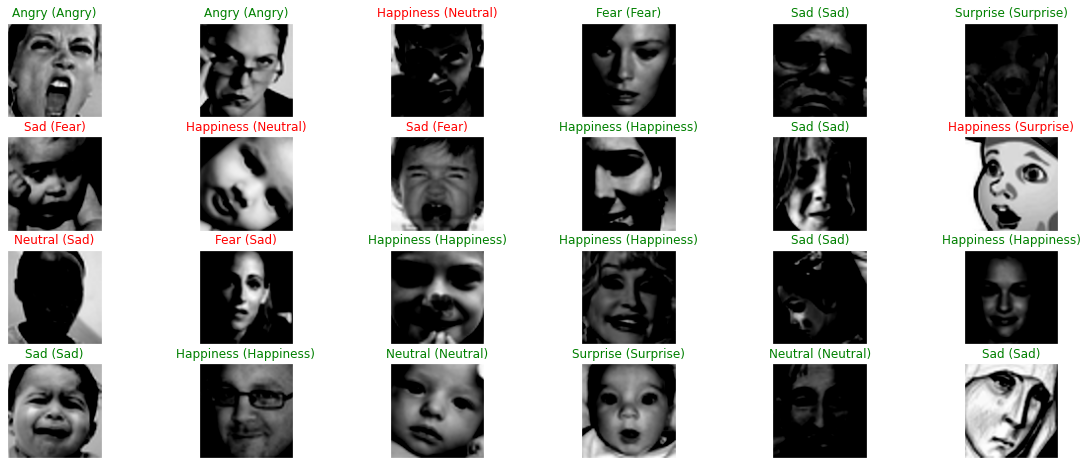

In [ ]:
labels = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
y_pred = np.argmax(model.predict(x_test), axis=-1)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]),cmap="gray")
    predict_index = labels[(y_pred[index])]
    true_index = labels[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

113/113 [==============================] - 3s 26ms/step


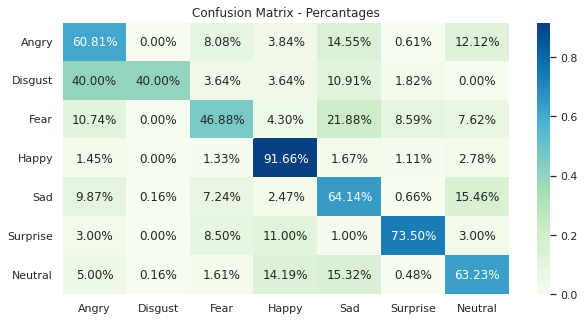

In [ ]:
# get models predictions as a single label
y_pred = np.argmax(model.predict(x_test), axis=-1)

# create confusion matrix
cm_array = confusion_matrix(np.argmax(y_test, axis=-1), y_pred,
                            normalize='true')

# labels of the confusion matrix
cm_labels = ["Angry", "Disgust", "Fear", "Happy",
             "Sad", "Surprise", "Neutral"]

# create data frame of confusion matrix and labels
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

# plot confusion matrix
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix - Percantages")
sns.heatmap(cm_array_df, annot=True, fmt='.2%', cmap="GnBu")
plt.show()

The matrix shows that the model is able to correctly classify most of the emotions in the test set, with the highest accuracy for the 'happy' emotion and the lowest accuracy for the 'disgust' emotion

## *Model 2 - CNN from scratch*
Because all pre trained model expect and rgb image We will create a simple deep neural network model from scratch that expects a 2D image to predict for each image its label.

We begin with spliting our data into train and test data. Then, we preprocess the images:

expand image dimension to 48 X 48 X 1 - in order to have 3 dimensions.

normalize images.

Create one hot of labels for model training.

**Data Pre-processing**

In [ ]:
#data = data.sample(frac=1)

In [ ]:
labels = to_categorical(data[['emotion']], num_classes=7)
# normalize images
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

**Standardization**

We will change the data structure to feed the standart scaler to implement standardization process to our data. Since StandartScaler() function only takes 2 dimensional array we will reshape the data then apply our scaler to make the mean zero and standart deviation as unit.

In [ ]:
from sklearn.preprocessing import StandardScaler
pixels = train_pixels.reshape((35887*2304,1))
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

**Reshaping the data (48,48)**
After that, we will reshape the data to make our image pixels ready to split operation.

In [ ]:
pixels = train_pixels.reshape((35887, 48, 48,1))

**Train test validation split**

Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [ ]:
# define arrays
x_train: np.ndarray = None
x_test: np.ndarray = None
y_train: np.ndarray = None
y_test: np.ndarray = None
x_val: np.ndarray = None
y_val: np.ndarray = None
    
# Split data into training, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, stratify=y_train_val)


In [ ]:
# expand image dimension
x_train: np.ndarray = x_train.reshape(x_train.shape + (1,))
x_test: np.ndarray = x_test.reshape(x_test.shape + (1,))
x_val: np.ndarray = x_val.reshape(x_val.shape + (1,))


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


Next, we build the a cnn model to predict our image labels

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam,SGD
import tensorflow as tf
from keras import regularizers

def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(32,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(64,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(128,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = 'adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [ ]:
model1 = cnn_model()

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)       

Compiling the model using categorical crossentropy because this is a multi-class classification task

In [ ]:
# compile model
model1.compile(optimizer= 'adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])
     

In [ ]:
from keras.callbacks import EarlyStopping

# Training
# path to save best model weights
checkpoint_file_path = '/content/checkpoint'

# model check point to save best model weights
model1_checkpoint_callback = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,save_weights_only=True,
    monitor='val_accuracy', mode='max',save_best_only=True)
]

# start training
history = model1.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data = val_datagen.flow(x_val, y_val, batch_size=32),
    epochs=30,callbacks=[model1_checkpoint_callback]
)

Epoch 1/30
909/909 [==============================] - 44s 33ms/step - loss: 2.7886 - accuracy: 0.2036 - val_loss: 2.0882 - val_accuracy: 0.2393
Epoch 2/30
909/909 [==============================] - 33s 36ms/step - loss: 1.9835 - accuracy: 0.2381 - val_loss: 1.8952 - val_accuracy: 0.2570
Epoch 3/30
909/909 [==============================] - 30s 33ms/step - loss: 1.9046 - accuracy: 0.2536 - val_loss: 1.9558 - val_accuracy: 0.2424
Epoch 4/30
909/909 [==============================] - 30s 33ms/step - loss: 1.9135 - accuracy: 0.2668 - val_loss: 1.9011 - val_accuracy: 0.2786
Epoch 5/30
909/909 [==============================] - 31s 34ms/step - loss: 1.8898 - accuracy: 0.2797 - val_loss: 1.9221 - val_accuracy: 0.2709
Epoch 6/30
909/909 [==============================] - 30s 33ms/step - loss: 1.8808 - accuracy: 0.2898 - val_loss: 1.8296 - val_accuracy: 0.3198
Epoch 7/30
909/909 [==============================] - 29s 32ms/step - loss: 1.8749 - accuracy: 0.3068 - val_loss: 1.8591 - val_accuracy:

**Visualizing the model performance**

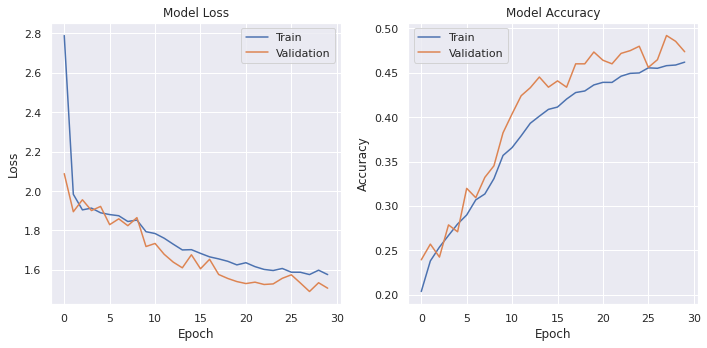

In [ ]:
#create sub plot
fig: mpl.figure.Figure = None
ax: np.ndarray = None
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# add loss plot
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper right')


# add accuracy plot
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

# plot
plt.tight_layout()
plt.show()

**Training and Validation Loss Plots**: The training and validation loss curves show a steady decrease over the epochs, indicating that the model is learning and improving. However, the validation loss is higher than the training loss, which may suggest that the model is overfitting to the training data. It appears that the model achieves the lowest loss around epoch 15, after which the validation loss starts to increase slightly.

**Training and Validation Accuracy Plots**: The training and validation accuracy curves show that the model is able to achieve high accuracy on both the training and validation sets, with a maximum validation accuracy of around 60%. However, the accuracy on the validation set seems to plateau after around 10 epochs, while the training accuracy continues to increase. This may again suggest overfitting to the training data.

113/113 [==============================] - 1s 4ms/step


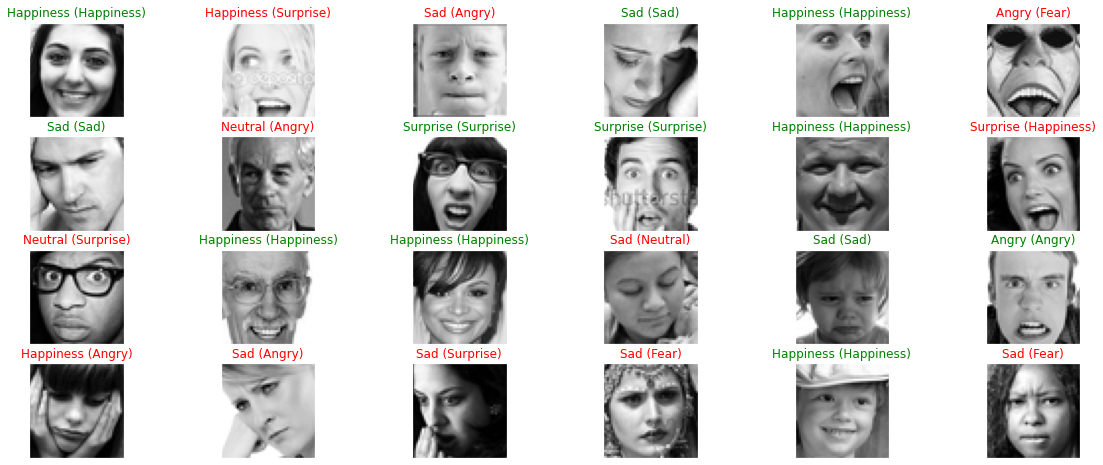

In [ ]:
labels = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
y_pred = np.argmax(model1.predict(x_test), axis=-1)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]),cmap="gray")
    predict_index = labels[(y_pred[index])]
    true_index = labels[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

Let's plot the confusion matrix in order to get a better understanding of our models predictions

113/113 [==============================] - 0s 3ms/step


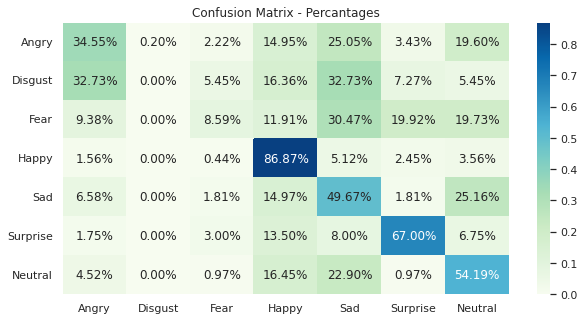

In [ ]:
# get models predictions as a single label
y_pred = np.argmax(model1.predict(x_test), axis=-1)

# create confusion matrix
cm_array = confusion_matrix(np.argmax(y_test, axis=-1), y_pred,
                            normalize='true')

# labels of the confusion matrix
cm_labels = ["Angry", "Disgust", "Fear", "Happy",
             "Sad", "Surprise", "Neutral"]

# create data frame of confusion matrix and labels
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

# plot confusion matrix
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix - Percantages")
sns.heatmap(cm_array_df, annot=True, fmt='.2%', cmap="GnBu")
plt.show()

The confusion matrix shows that the model is able to classify the 'happy' and 'neutral' emotions with relatively high accuracy, but struggles with some of the other emotions such as 'disgust', 'fear', and 'surprise'. The highest confusion is between 'sad' and 'neutral' emotions.

After experementing with multiple data types and models we can see that Transfer Learning using Xception - Classifies Happy, Sad, Surprise, Neutral better and Angry, Disgust, Fear and Sad less and CNN - Classifies Happy, Sad, Surprise, Neutral better and Angry, Disgust, Fear less.
We achieve a test accuracy of 68% with our Xception model and 46% accuracy with CNN model that we are gonna try to ameliorate it.

The CNN model from scratch is able to achieve some degree of accuracy on the task of emotion recognition, but it seems to struggle with certain emotions and may be overfitting to the training data. Transfer learning with a pre-trained model such as Xception or fine-tuned Xception may be a useful alternative for improving performance on this task.

## Fine tuning
**Changing optimizer** : Changing Optimizer to Stochastic Gradient Descent (SGD)

In [ ]:
import tensorflow as tf
# compile model
model1.compile(optimizer=tf.keras.optimizers.SGD(0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])
     

In [ ]:
# Training
# path to save best model weights
checkpoint_file_path = '/content/checkpoint'

# model check point to save best model weights
model1_checkpoint_callback = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,save_weights_only=True,
    monitor='val_accuracy', mode='max',save_best_only=True)
]

# start training
history = model1.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data = val_datagen.flow(x_val, y_val, batch_size=32),
    epochs=30,callbacks=[model1_checkpoint_callback]
)

Epoch 1/30
909/909 [==============================] - 33s 34ms/step - loss: 1.5642 - accuracy: 0.4654 - val_loss: 1.4528 - val_accuracy: 0.5071
Epoch 2/30
909/909 [==============================] - 29s 32ms/step - loss: 1.5500 - accuracy: 0.4706 - val_loss: 1.4488 - val_accuracy: 0.5031
Epoch 3/30
909/909 [==============================] - 30s 33ms/step - loss: 1.5364 - accuracy: 0.4753 - val_loss: 1.4397 - val_accuracy: 0.5084
Epoch 4/30
909/909 [==============================] - 33s 36ms/step - loss: 1.5285 - accuracy: 0.4733 - val_loss: 1.4312 - val_accuracy: 0.5040
Epoch 5/30
909/909 [==============================] - 30s 33ms/step - loss: 1.5214 - accuracy: 0.4757 - val_loss: 1.4272 - val_accuracy: 0.5093
Epoch 6/30
909/909 [==============================] - 31s 34ms/step - loss: 1.5159 - accuracy: 0.4755 - val_loss: 1.4128 - val_accuracy: 0.5093
Epoch 7/30
909/909 [==============================] - 30s 33ms/step - loss: 1.5051 - accuracy: 0.4781 - val_loss: 1.4013 - val_accuracy:

In [ ]:
# load best weights from training
model1.load_weights(checkpoint_file_path)

# evalute model on test data
model1_eval: List[float] = model1.evaluate(x_test, y_test) 
print(f"Model loss: {model1_eval[0]}\nModel accuracy {model1_eval[1]}")

113/113 [==============================] - 1s 5ms/step - loss: 1.3158 - accuracy: 0.5394
Model loss: 1.3158477544784546
Model accuracy 0.5394260287284851


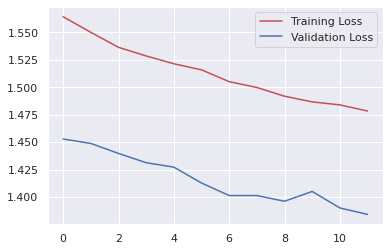

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

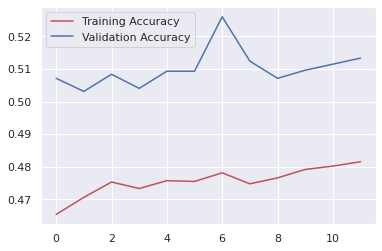

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

The model trained with SGD give better accuracy but a higher validation loss suggests that the model is overfitting since it is able to perform well in training data but somewhat fails to replicate the same performance on the unseen validation/test data, so we must try getting more data or use regularization/dropout etc to reduce overfitting.

**Changing epoch number**

In [ ]:
model1.compile(
    optimizer = 'adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Training
# path to save best model weights
checkpoint_file_path = '/content/checkpoint'

# model check point to save best model weights
model1_checkpoint_callback = [#EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              #restore_best_weights=True,mode="max",patience = 5),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,save_weights_only=True,
    monitor='val_accuracy', mode='max',save_best_only=True)
]

# start training
history = model1.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data = val_datagen.flow(x_val, y_val, batch_size=32),
    epochs=50,callbacks=[model1_checkpoint_callback]
)

Epoch 1/50
909/909 [==============================] - 31s 34ms/step - loss: 1.5473 - accuracy: 0.4743 - val_loss: 1.4721 - val_accuracy: 0.4950
Epoch 2/50
909/909 [==============================] - 30s 33ms/step - loss: 1.5492 - accuracy: 0.4713 - val_loss: 1.4570 - val_accuracy: 0.5012
Epoch 3/50
909/909 [==============================] - 30s 33ms/step - loss: 1.5384 - accuracy: 0.4738 - val_loss: 1.4549 - val_accuracy: 0.5121
Epoch 4/50
909/909 [==============================] - 31s 34ms/step - loss: 1.5529 - accuracy: 0.4756 - val_loss: 1.5018 - val_accuracy: 0.4944
Epoch 5/50
909/909 [==============================] - 31s 34ms/step - loss: 1.5488 - accuracy: 0.4745 - val_loss: 1.4741 - val_accuracy: 0.4932
Epoch 6/50
909/909 [==============================] - 32s 36ms/step - loss: 1.5590 - accuracy: 0.4749 - val_loss: 1.4573 - val_accuracy: 0.5022
Epoch 7/50
909/909 [==============================] - 30s 33ms/step - loss: 1.5498 - accuracy: 0.4739 - val_loss: 1.4654 - val_accuracy: